# Modern Portfolio Theory

According to MPT, all the investments that are selected are combined together in a way that reduces the risk in the market through the means of diversification and, at the same time, also generates a good return in the long term to the investors

### Portfolio Return
A portfolio consisting of n assets, will have a return given by

$ r_p = \vec{w}^{T} \cdot \vec{r} $

where $ \vec{r} $ is the vector of average annual returns of the assets, and $ \vec{w} $ is the vector of asset weights within the portfolio.

### Portfolio Variance

The portfolio's variance is given by

$ \sigma_p^2 = \vec{w}^{T} \boldsymbol{\Sigma} \vec{w}$

where $ \Sigma $ is the assets' variance-covariance matrix 

### Sharpe Ratio

The Sharpe ratio divides a portfolio's excess returns by a measure of its volatility to assess risk-adjusted performance

$ S = \Large{\frac{r_p - r_f}{\sigma_p}} $

In [160]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Asset Data

1. Set up the parameters:

In [161]:
ASSETS = ['AAPL', 'IBM', 'MSFT', 'META']

START_DATE = '2020-01-01'
END_DATE = '2023-02-14'

prices = yf.download(ASSETS, start=START_DATE, end=END_DATE)

print(prices[:20])

[*********************100%***********************]  4 of 4 completed
            Adj Close                                          Close  \
                 AAPL         IBM        META        MSFT       AAPL   
Date                                                                   
2020-01-02  73.059418  105.346344  209.557648  154.493835  75.087502   
2020-01-03  72.349144  104.506187  208.448837  152.570145  74.357498   
2020-01-06  72.925629  104.319496  212.374680  152.964447  74.949997   
2020-01-07  72.582649  104.389488  212.834183  151.569778  74.597504   
2020-01-08  73.750252  105.260757  214.991898  153.984070  75.797501   
2020-01-09  75.316750  106.373207  218.068634  155.907776  77.407501   
2020-01-10  75.487030  106.334297  217.828873  155.186356  77.582497   
2020-01-13  77.099754  106.264275  221.674805  157.052368  79.239998   
2020-01-14  76.058670  105.657516  218.827820  155.946228  78.169998   
2020-01-15  75.732697  106.279846  220.915604  156.956192  77.83499

### Plot Asset Prices

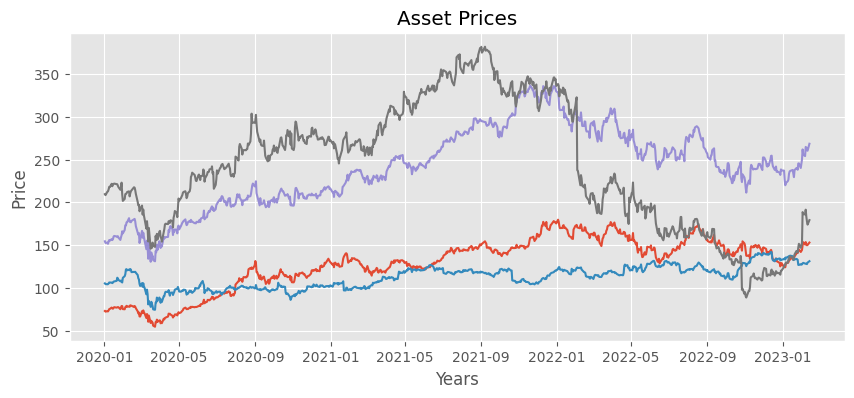

In [162]:
plt.figure(figsize=(10,4))

plt.plot(prices.index, prices[('Adj Close', 'AAPL')])

plt.plot(prices.index, prices[('Adj Close', 'IBM')])

plt.plot(prices.index, prices[('Adj Close', 'MSFT')])

plt.plot(prices.index, prices[('Adj Close', 'META')])

plt.title("Asset Prices")

plt.xlabel("Years")

plt.ylabel("Price")

plt.show()

### Asset Returns

We calcluate simple daily returns $ r = \frac{S_{t+1}}{S_t} -1 $

In [163]:
simple_daily_returns = prices['Adj Close'].pct_change().dropna()

simple_daily_returns[:20]

,AAPL,IBM,META,MSFT
Date,,,,
2020-01-03,-0.009722,-0.007975,-0.005291,-0.012452
2020-01-06,0.007968,-0.001786,0.018834,0.002584
2020-01-07,-0.004703,0.000671,0.002164,-0.009118
2020-01-08,0.016087,0.008346,0.010138,0.015929
2020-01-09,0.021241,0.010569,0.014311,0.012493
2020-01-10,0.002261,-0.000366,-0.001099,-0.004627
2020-01-13,0.021364,-0.000659,0.017656,0.012024
2020-01-14,-0.013503,-0.005710,-0.012843,-0.007043
2020-01-15,-0.004286,0.005890,0.009541,0.006476


For log-returns (which are additive)

In [164]:
log_daily_returns = np.log(prices['Adj Close'] / prices['Adj Close'].shift(1)).dropna()

log_daily_returns[:20]

,AAPL,IBM,META,MSFT
Date,,,,
2020-01-03,-0.009769,-0.008007,-0.005305,-0.012530
2020-01-06,0.007937,-0.001788,0.018658,0.002581
2020-01-07,-0.004714,0.000671,0.002161,-0.009159
2020-01-08,0.015959,0.008312,0.010087,0.015803
2020-01-09,0.021018,0.010513,0.014210,0.012415
2020-01-10,0.002258,-0.000366,-0.001100,-0.004638
2020-01-13,0.021139,-0.000659,0.017502,0.011953
2020-01-14,-0.013595,-0.005726,-0.012926,-0.007068
2020-01-15,-0.004295,0.005873,0.009496,0.006455


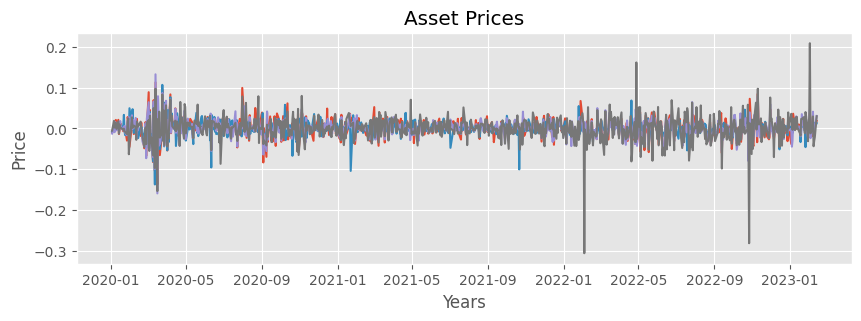

In [165]:
plt.figure(figsize=(10,3))

plt.plot(log_daily_returns.index, log_daily_returns['AAPL'])

plt.plot(log_daily_returns.index, log_daily_returns['IBM'])

plt.plot(log_daily_returns.index, log_daily_returns['MSFT'])

plt.plot(log_daily_returns.index, log_daily_returns['META'])

plt.title("Asset Prices")

plt.xlabel("Years")

plt.ylabel("Price")

plt.show()

## Portfolio of Equally Weighted Assets

Let's create a portfolio with n equally weighted assets

In [166]:
portfolio_weights = len(ASSETS) * [1 / len(ASSETS)]

portfolio_weights

[0.25, 0.25, 0.25, 0.25]

Calculate portfolio returns using $ r_p = \vec{w}^{T} \cdot \vec{r}  =  \vec{r}^{T} \cdot \vec{w} $

In [167]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, log_daily_returns.T), index = log_daily_returns.index)

portfolio_returns[:10]

Date
2020-01-03   -0.008903
2020-01-06    0.006847
2020-01-07   -0.002760
2020-01-08    0.012540
2020-01-09    0.014539
2020-01-10   -0.000961
2020-01-13    0.012484
2020-01-14   -0.009829
2020-01-15    0.004382
2020-01-16    0.010828
dtype: float64

## Portfolios of Random Weights

The number of portfolios we are constructing using our assets, each with different asset weights.

In [168]:
N_PORTFOLIOS = 10**5

Calculate the annualized average asset returns 

$ \bar{R}_y = \bar{R}_d \times 252 $

$ \bar{R}_d $ = average daily returns, $ \bar{R}_y $ = annual average asset log returns



AAPL    0.237658
IBM     0.070695
META   -0.050231
MSFT    0.177579
dtype: float64


Text(0, 0.5, 'Asset returns')

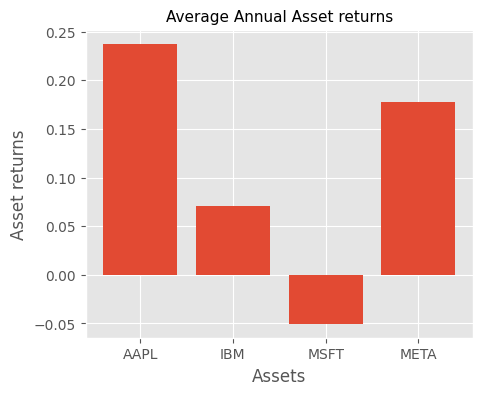

In [169]:
avg_annual_asset_log_returns = log_daily_returns.mean() * 252

print(avg_annual_asset_log_returns)


# plot the average annual asset returns on a bar chart
plt.figure(figsize=(5,4))
plt.bar(ASSETS, avg_annual_asset_log_returns)

plt.title('Average Annual Asset returns', fontsize=11)
plt.xlabel('Assets')
plt.ylabel("Asset returns")

Calculate the annualized covariant matrix of the assets

In [170]:
cov_mat = log_daily_returns.cov() * 252

cov_mat

,AAPL,IBM,META,MSFT
AAPL,0.134030,0.050554,0.113776,0.102581
IBM,0.050554,0.091252,0.041944,0.049198
META,0.113776,0.041944,0.261167,0.112292
MSFT,0.102581,0.049198,0.112292,0.121074


Generate random portfolio weights:

In [171]:
np.random.seed(42)

weights = np.random.random(size=(N_PORTFOLIOS, len(ASSETS)))

weights

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985],
       ...,
       [0.59434465, 0.83958621, 0.83204045, 0.12633307],
       [0.68086432, 0.39162364, 0.74418775, 0.75014828],
       [0.27252781, 0.5755887 , 0.89333979, 0.50242265]])

Normalize the asset weights (across each row)

In [172]:
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

weights

array([[0.14102156, 0.35796222, 0.27560979, 0.22540643],
       [0.12620081, 0.1261813 , 0.04698284, 0.70063506],
       [0.2613905 , 0.30790022, 0.00895102, 0.42175826],
       ...,
       [0.24844023, 0.35095292, 0.34779874, 0.05280811],
       [0.26525555, 0.15257129, 0.28992551, 0.29224765],
       [0.12145388, 0.25651504, 0.39812299, 0.22390809]])

### Portfolio Returns

Each of our portfolios generates different returns, volatilities and Sharpe ratios. Let's calculate them.

Calculate each portfolio's return using $ r_p = \vec{w}^{T} \cdot \vec{r} $. 
This is simply the dot product between the weights vector per portfolio and the average annual log return of each asset

In [173]:
portf_annual_returns = np.dot(weights, avg_annual_asset_log_returns)

print(portf_annual_returns)

portf_annual_returns.shape


[0.08500456 0.16097148 0.15833469 ... 0.07576195 0.11116019 0.06676228]


(100000,)

### Portfolio Volatility

Calculate each portfolio's volatility (variance) and store them in an array

The portfolio's variance is given by

$ \sigma_p^2 = \vec{w}^{T} \boldsymbol{\Sigma} \vec{w}$

[0.301638   0.31825601 0.29070681 ... 0.31432266 0.32934951 0.33078337]
(100000,)


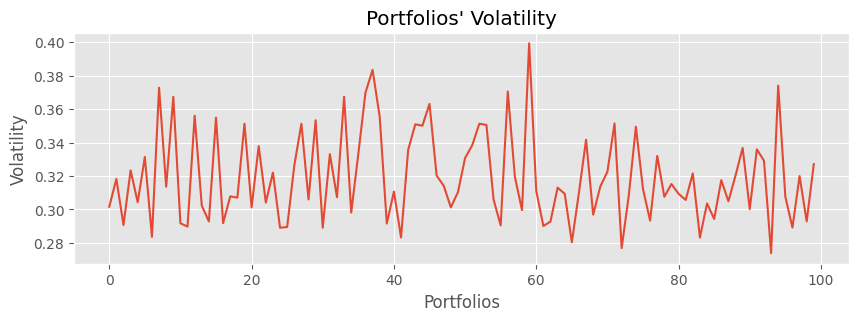

In [174]:
portf_vol = []

# loop over each portfolio weights dataframe row
for i in range(0, len(weights)):
    
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))

# convert python array to a numpy array    
portf_vol = np.array(portf_vol)  

print(portf_vol)

print(portf_vol.shape)

# plot the volatilies for the first 100 portfolios
plt.figure(figsize=(10,3))
x = range(0, len(portf_vol))

plt.plot(x[0:100], portf_vol[0:100])

plt.title("Portfolios' Volatility")
plt.xlabel("Portfolios")
plt.ylabel("Volatility")
plt.show()

Calculate each portfolio's Sharpe ratio

[0.28180984 0.50579242 0.5446542  ... 0.2410324  0.33751438 0.20183081]
(100000,)


Text(0, 0.5, 'Sharpe Ratio')

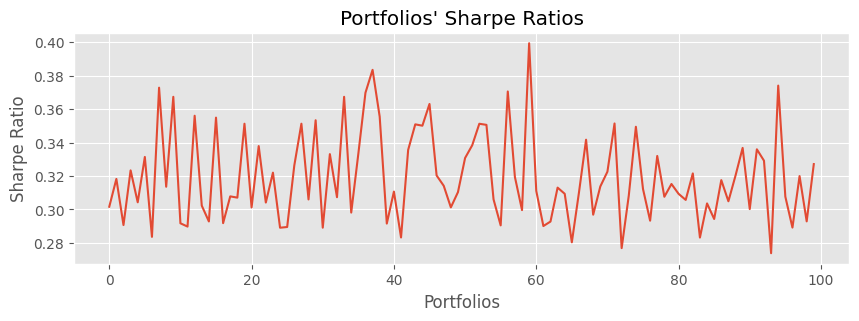

In [175]:
portf_sharpe_ratio = portf_annual_returns / portf_vol

print(portf_sharpe_ratio)

print(portf_sharpe_ratio.shape)

# plot the Sharpe ratios for the first 100 portfolios
plt.figure(figsize=(10,3))
x = range(0, len(portf_vol))

plt.plot(x[0:100], portf_vol[0:100])

plt.title("Portfolios' Sharpe Ratios")
plt.xlabel("Portfolios")
plt.ylabel("Sharpe Ratio")

Create a joint DataFrame with all calculations for each portfolio (returns, volatility, Sharpe ratio)

In [176]:
portf_results = pd.DataFrame({'returns': portf_annual_returns, 'volatility': portf_vol, 'sharpe_ratio': portf_sharpe_ratio})

portf_results

,returns,volatility,sharpe_ratio
0,0.085005,0.301638,0.281810
1,0.160971,0.318256,0.505792
2,0.158335,0.290707,0.544654
3,0.167576,0.323370,0.518217
4,0.089824,0.304277,0.295205
...,...,...,...
99995,0.045970,0.304096,0.151170
99996,0.151374,0.324481,0.466512
99997,0.075762,0.314323,0.241032
99998,0.111160,0.329350,0.337514


Let's plot these portfolio results on a return/volatility graph where the Sharpe ratios represent the heatmap

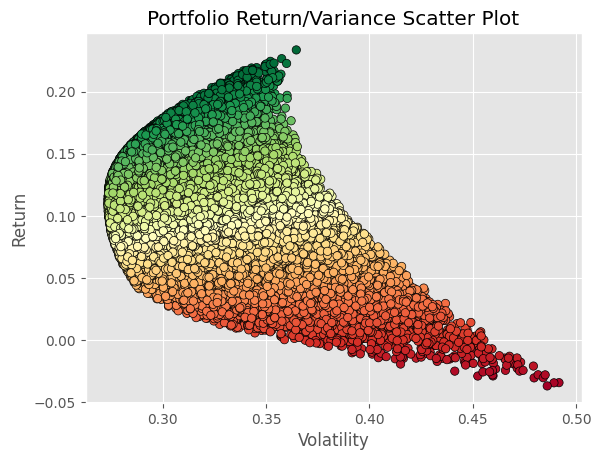

In [177]:
plt.scatter(x = portf_results['volatility'], 
            y = portf_results['returns'],
            c = portf_results['sharpe_ratio'],
            cmap = 'RdYlGn',
            edgecolors='black')

plt.title('Portfolio Return/Variance Scatter Plot')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.show()


## Efficient Frontier

Locate the points creating the Efficient Frontier. This is done by scanning the returns on the returns axis, by creatinga linspace, then selecting all the portfolios that have that return, finally selecting the portfolio with the minimum volatility.

In [178]:
# number of points on the efficient frontier
N_POINTS = 150

# efficient frontier volatility
portf_vol_ef = []

# linpsace from min portfolio return to max portfolio return
portf_rtns_ef = np.linspace(portf_results.returns.min(), portf_results.returns.max(), N_POINTS)

# round the efficient frontier returns
portf_rtns_ef = np.round(portf_rtns_ef, 2)

indices_to_skip = []

# round off the portfolio returns
portf_rtns = np.round(portf_annual_returns, 2)

# loop over the N_POINTS defined above (from min portfolio return to max portfolio return)
for point_index in range(N_POINTS):
    
    # if the portfolio efficient frontier return is not in the portfolio returns
    if portf_rtns_ef[point_index] not in portf_rtns:
        
        # add to skipped index list
        indices_to_skip.append(point_index)
        
        # skip to next for loop index
        continue
    
    # if portf_rtns_ef is found in portf_rtns
    # get the index in portf_rtns   
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    
    # get the minimum portfolio volatility within that index 
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

print(portf_rtns_ef[:10])
print(portf_vol_ef[:10])

[-0.04 -0.04 -0.03 -0.03 -0.03 -0.03 -0.03 -0.02 -0.02 -0.02]
[0.4860274566918234, 0.4860274566918234, 0.4412726148020663, 0.4412726148020663, 0.4412726148020663, 0.4412726148020663, 0.4412726148020663, 0.4124404663458579, 0.4124404663458579, 0.4124404663458579]


Plot the efficient frontier

Text(0, 0.5, 'Return')

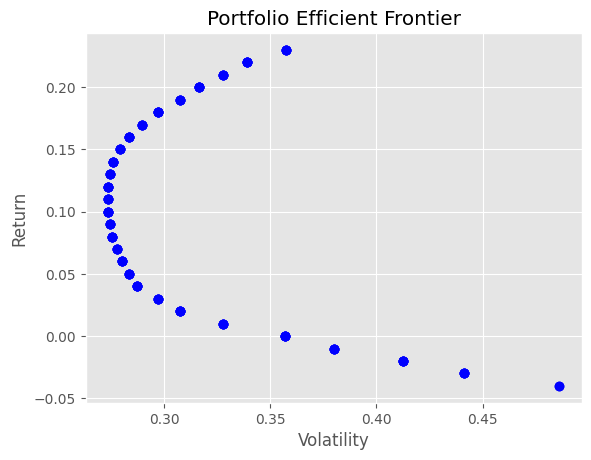

In [179]:
plt.plot(portf_vol_ef, portf_rtns_ef, 'bo')

plt.title('Portfolio Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')

Create a combined plot

In [180]:
portf_vol_ef[:10]

[0.4860274566918234,
 0.4860274566918234,
 0.4412726148020663,
 0.4412726148020663,
 0.4412726148020663,
 0.4412726148020663,
 0.4412726148020663,
 0.4124404663458579,
 0.4124404663458579,
 0.4124404663458579]

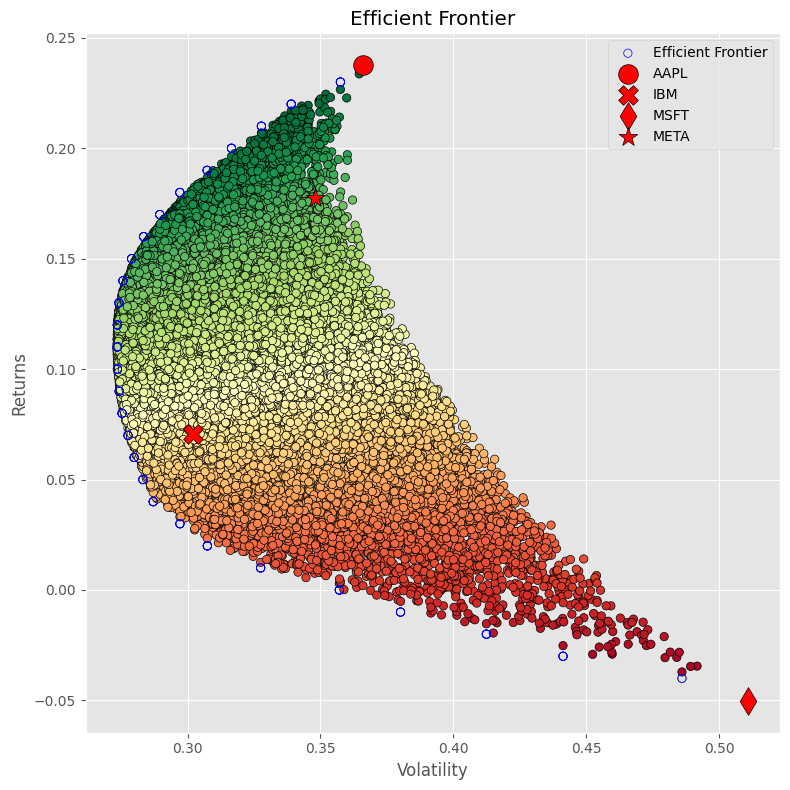

In [181]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots(figsize=(8, 8))

ax.set(xlabel = 'Volatility', ylabel = 'Returns', title = 'Efficient Frontier')

# 1. Scatter plot all the portfolios on the graph 
ax.scatter(x = portf_results['volatility'], 
           y = portf_results['returns'],
           c = portf_results['sharpe_ratio'],
           cmap = 'RdYlGn',
           edgecolors='black')


# 2. Plot efficient frontier as a blue dashed curve
ax.scatter(x=portf_vol_ef, 
           y=portf_rtns_ef, 
           facecolors='none', 
           edgecolors='b',
           label = "Efficient Frontier")


# 3. Scatter plot each individual asset
for asset_index in range(len(ASSETS)):
    
    ax.scatter(x = np.sqrt(cov_mat.iloc[asset_index, asset_index]), # asset volatility
               y = avg_annual_asset_log_returns[asset_index],       # asset return
               marker = MARKS[asset_index],
               s = 200,
               color = 'red',
               edgecolors='black',
               label = ASSETS[asset_index])
    
ax.legend()

plt.tight_layout()

plt.show()

### Finding the Maximum Sharpe Ratio

Select the maximum Sharpe ratio directly from the list **portf_results.sharpe_ratio** along with the return and volatility of that portfolio

In [182]:
# We can evaluate the maximum Sharpe ratio using np.max(portf_results.sharpe_ratio)
# However, to evaluate the return and volatility we need to get the index of the max Sharpe
max_sharpe_ind = np.argmax(portf_results.sharpe_ratio)

# now get the max Sharpe portfolio
max_sharpe_portf = portf_results.loc[max_sharpe_ind]

max_sharpe_portf

returns         0.233685
volatility      0.364579
sharpe_ratio    0.640973
Name: 91371, dtype: float64

In [183]:
# Get the weights of this portfolio

for x, y in zip(ASSETS, weights[np.argmax(portf_results.sharpe_ratio)]):
    
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

AAPL: 98.33% IBM: 0.33% MSFT: 1.15% META: 0.19% 

### Finding the Minimum Volatility Portfolio

This will be the portfolio on the left-most part of the return/volatility plot

In [184]:
# We can evaluate the minimum volatility using np.min(portf_results.volatility)
# However, to evaluate the return and Sharpe ratio of the portfolio, we need the index

min_vol_ind = np.argmin(portf_results.volatility)

min_vol_portf = portf_results.loc[min_vol_ind]

min_vol_portf

returns         0.109450
volatility      0.273472
sharpe_ratio    0.400225
Name: 65623, dtype: float64

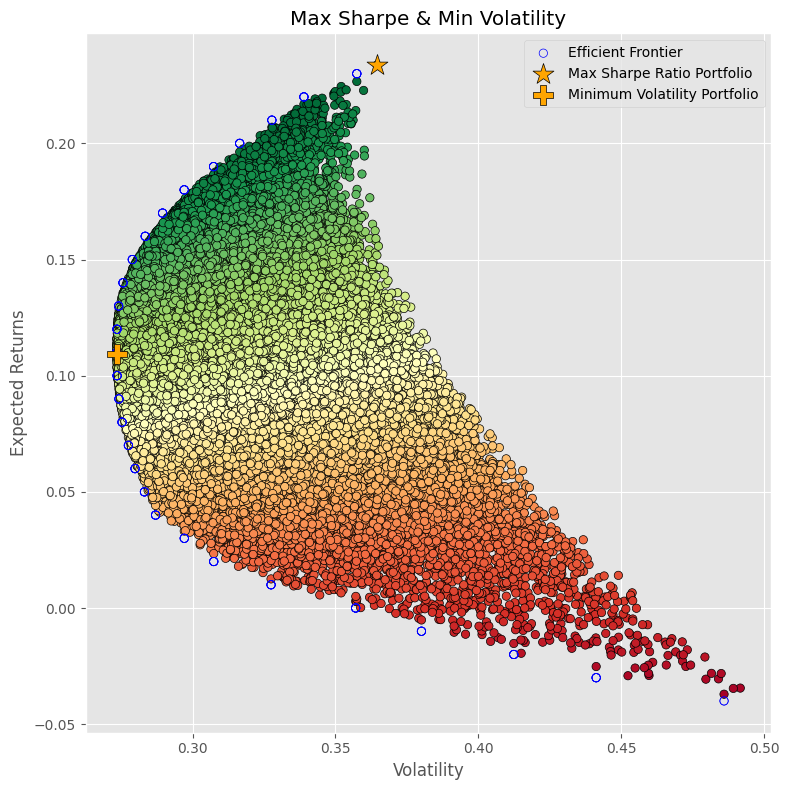

In [185]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots(figsize=(8, 8))

ax.set(xlabel = 'Volatility', ylabel = 'Returns', title = 'Efficient Frontier')

# 1. Scatter plot all the portfolios on the graph 
ax.scatter(x = portf_results['volatility'], 
           y = portf_results['returns'],
           c = portf_results['sharpe_ratio'],
           cmap = 'RdYlGn',
           edgecolors='black')

# 2. Plot efficient frontier as a blue dashed curve
ax.scatter(x=portf_vol_ef, 
           y=portf_rtns_ef, 
           facecolors='none', 
           edgecolors='b',
           label = "Efficient Frontier")

# 3. Max Sharep Ratio    
ax.scatter(x = max_sharpe_portf.volatility, 
           y = max_sharpe_portf.returns, 
           color = 'orange', 
           edgecolors='black', 
           marker = '*', 
           s = 250, 
           label = 'Max Sharpe Ratio Portfolio')

# 4. Minimum Volatility
ax.scatter(x = min_vol_portf.volatility, 
           y = min_vol_portf.returns, 
           color = 'orange',   
           edgecolors='black', 
           marker='P', 
           s = 200, 
           label = 'Minimum Volatility Portfolio')

ax.set(xlabel = 'Volatility', ylabel = 'Expected Returns', title = 'Max Sharpe & Min Volatility')

ax.legend()

plt.tight_layout()

plt.show()

## Finding the Efficient Frontier using scipy optimization

We start by defining functions calculating portfolio returns and volatility

In [186]:
def get_portf_rtn(w, avg_rtns):
    
    return np.sum(avg_rtns * w)
    

def get_portf_vol(w, avg_rtns, cov_mat):
    
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

Define the function calculating the efficient frontier:

In [187]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    
    efficient_portfolios = []
    
    n_assets = len(avg_annual_asset_log_returns)
    
    args = (avg_annual_asset_log_returns, cov_mat)
    
    bounds = tuple((0,1) for asset in range(n_assets))
    
    initial_guess = n_assets * [1. / n_assets, ]
    
    for ret in rtns_range:
        
        constraints = ({'type': 'eq', 'fun': lambda x: get_portf_rtn(x, avg_rtns) - ret}, 
                       {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        
        efficient_portfolio = sco.minimize(get_portf_vol, 
                                           initial_guess, 
                                           args=args, 
                                           method='SLSQP', 
                                           constraints=constraints, 
                                           bounds=bounds)
        
        efficient_portfolios.append(efficient_portfolio)
    
    return efficient_portfolios

4. Define the considered range of returns:

In [188]:
rtns_range = np.linspace(-0.22, 0.32, 200)

5. Calculate the Efficient Frontier:

In [189]:
efficient_portfolios = get_efficient_frontier(avg_annual_asset_log_returns, cov_mat, rtns_range)

6. Extract the volatilities of the efficient portfolios:

In [190]:
vols_range = [x['fun'] for x in efficient_portfolios]

7. Plot the calculated Efficient Frontier, together with the simulated portfolios:

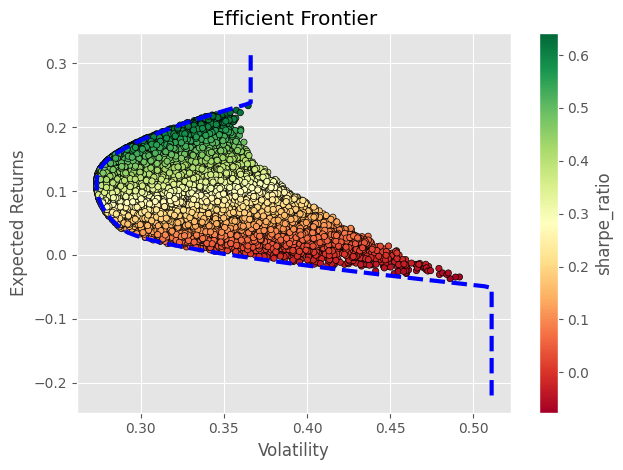

In [191]:
fig, ax = plt.subplots()

portf_results.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', 
                      cmap='RdYlGn', edgecolors='black', ax=ax)

ax.plot(vols_range, rtns_range, 'b--', linewidth=3)

ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')

plt.tight_layout()

plt.show()

8. Identify the minimum volatility portfolio:

In [192]:
min_vol_ind = np.argmin(vols_range)

min_vol_portf_rtn = rtns_range[min_vol_ind]

min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']

min_vol_portf = {'Return': min_vol_portf_rtn, 'Volatility': min_vol_portf_vol, 
                 'Sharpe Ratio': (min_vol_portf_rtn / min_vol_portf_vol)}

min_vol_portf

{'Return': 0.11105527638190957,
 'Volatility': 0.2734501360404173,
 'Sharpe Ratio': 0.40612624294140065}

9. Print performance summary:

In [193]:
print('Minimum Volatility portfolio ----')

print('Performance')

for index, value in min_vol_portf.items():
    
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')

for x, y in zip(ASSETS, efficient_portfolios[min_vol_ind]['x']):
    
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
Return: 11.11% Volatility: 27.35% Sharpe Ratio: 40.61% 
Weights
AAPL: 11.30% IBM: 61.13% MSFT: 3.50% META: 24.07% 

Define the objective function:

In [194]:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    
    portf_returns = np.sum(avg_rtns * w)
    
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    
    return -portf_sharpe_ratio

Find the optimized portfolio:

In [195]:
n_assets = len(avg_annual_asset_log_returns)

RF_RATE = 0

args = (avg_annual_asset_log_returns, cov_mat, RF_RATE)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0,1) for asset in range(n_assets))

initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args, 
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)

Extract information about the maximum Sharpe Ratio portfolio:

In [196]:
max_sharpe_portf_w = max_sharpe_portf['x']

max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, avg_annual_asset_log_returns),
                    'Volatility': get_portf_vol(max_sharpe_portf_w, avg_annual_asset_log_returns, cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf['fun']
                   }

max_sharpe_portf

{'Return': 0.23765839097415203,
 'Volatility': 0.3661013680890385,
 'Sharpe Ratio': 0.6491600733826043}

Print performance summary:

In [197]:
print('Maximum Sharpe Ratio portfolio ----')

print('Performance')

for index, value in max_sharpe_portf.items():
    
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')

for x, y in zip(ASSETS, max_sharpe_portf_w):
    
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
Return: 23.77% Volatility: 36.61% Sharpe Ratio: 64.92% 
Weights
AAPL: 100.00% IBM: 0.00% MSFT: 0.00% META: 0.00% 

## Finding the Efficient Frontier using convex optimization with cvxpy

### Getting Ready

This recipe requires running all the code from the previous recipes:
* *Finding the Efficient Frontier using Monte Carlo simulations*
* *Finding the Efficient Frontier using optimization with scipy*

### How to do it...

1. Import the libraries:

In [198]:
import cvxpy as cp

2. Convert the annualized average returns and the covariance matrix to `numpy` arrays:

In [199]:
avg_returns = avg_annual_asset_log_returns.values

cov_mat = cov_mat.values

3. Set up the optimization problem:

In [200]:
weights = cp.Variable(n_assets)

gamma = cp.Parameter(nonneg=True)

portf_rtn_cvx = avg_returns @ weights 

portf_vol_cvx = cp.quad_form(weights, cov_mat)

objective_function = cp.Maximize(portf_rtn_cvx - gamma * portf_vol_cvx)

problem = cp.Problem(objective_function, [cp.sum(weights) == 1, weights >= 0])

4. Calculate the Efficient Frontier:

In [201]:
N_POINTS = 25

portf_rtn_cvx_ef = np.zeros(N_POINTS)

portf_vol_cvx_ef = np.zeros(N_POINTS)

weights_ef = []

gamma_range = np.logspace(-3, 3, num=N_POINTS)

for i in range(N_POINTS):
    gamma.value = gamma_range[i]
    
    problem.solve()
    
    portf_vol_cvx_ef[i] = cp.sqrt(portf_vol_cvx).value
    
    portf_rtn_cvx_ef[i] = portf_rtn_cvx.value
    
    weights_ef.append(weights.value)

5. Plot the allocation for different values of the risk-aversion parameter:

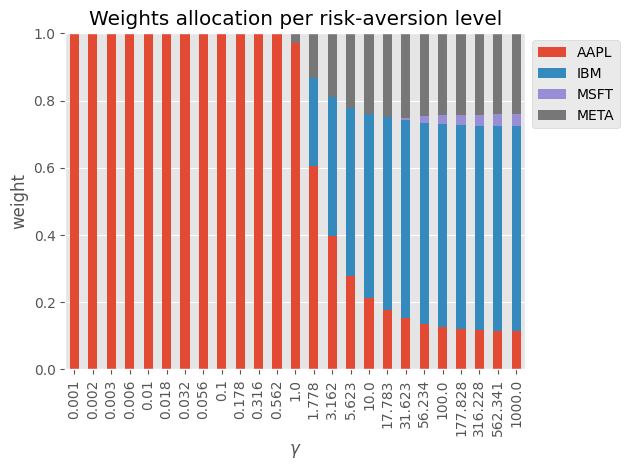

In [202]:
weights_df = pd.DataFrame(weights_ef, columns=ASSETS, 
                          index=np.round(gamma_range, 3))

ax = weights_df.plot(kind='bar', stacked=True) 

ax.set(title='Weights allocation per risk-aversion level', 
       xlabel=r'$\gamma$', ylabel='weight')

ax.legend(bbox_to_anchor=(1,1))

plt.tight_layout()

plt.show()

6. Plot the Efficient Frontier, together with the individual assets:

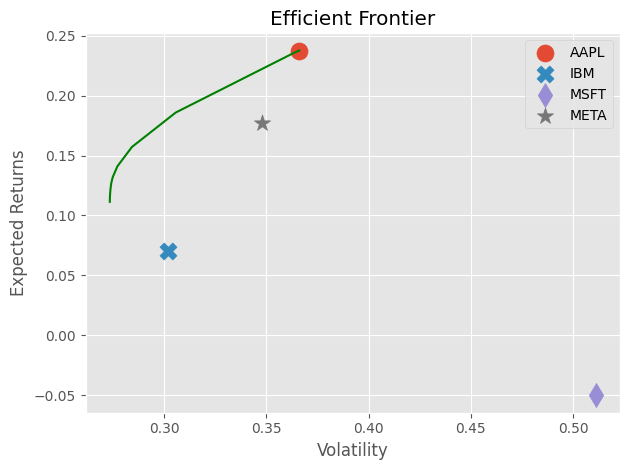

In [203]:
#MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots()

ax.plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, 'g-')

for asset_index in range(n_assets):
    
     plt.scatter(x=np.sqrt(cov_mat[asset_index, asset_index]), 
                 y=avg_returns[asset_index], 
                 marker=MARKS[asset_index], 
                 label=ASSETS[asset_index], 
                 s=150)
        
ax.set(title='Efficient Frontier', xlabel='Volatility', ylabel='Expected Returns', )

ax.legend()

plt.tight_layout()

plt.show()

### There's more

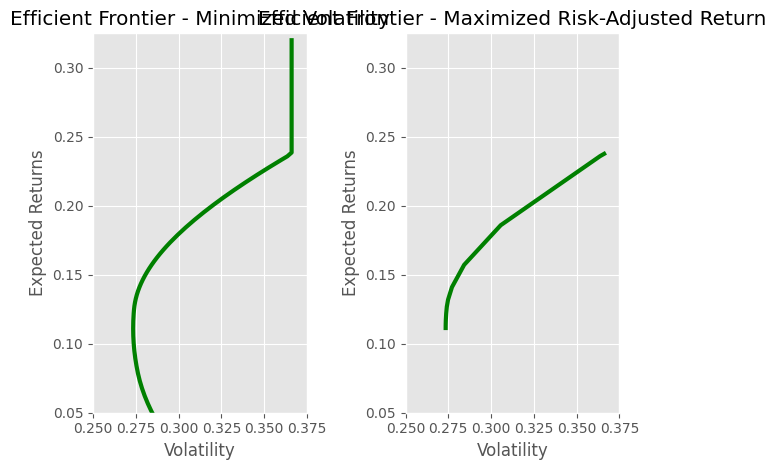

In [204]:
x_lim = [0.25, 0.375]

y_lim = [0.05, 0.325]

fig, ax = plt.subplots(1, 2)

ax[0].plot(vols_range, rtns_range, 'g-', linewidth=3)

ax[0].set(title='Efficient Frontier - Minimized Volatility', 
          xlabel='Volatility', 
          ylabel='Expected Returns', 
          xlim=x_lim, 
          ylim=y_lim)

ax[1].plot(portf_vol_cvx_ef, 
           portf_rtn_cvx_ef, 
           'g-', 
           linewidth=3)

ax[1].set(title='Efficient Frontier - Maximized Risk-Adjusted Return', 
          xlabel='Volatility', 
          ylabel='Expected Returns', 
          xlim=x_lim, 
          ylim=y_lim)

plt.tight_layout()

plt.show()

In [205]:
max_leverage = cp.Parameter()

problem_with_leverage = cp.Problem(objective_function, 
                                   [cp.sum(weights) == 1, 
                                    cp.norm(weights, 1) <= max_leverage])

In [206]:
LEVERAGE_RANGE = [1, 2, 5]

len_leverage = len(LEVERAGE_RANGE)

N_POINTS = 25

portf_vol_l_ef = np.zeros((N_POINTS, len_leverage))

portf_rtn_l_ef = np.zeros(( N_POINTS, len_leverage))

weights_ef = np.zeros((len_leverage, N_POINTS, n_assets))

for lev_ind, leverage in enumerate(LEVERAGE_RANGE):
    for gamma_ind in range(N_POINTS):
        max_leverage.value = leverage
        
        gamma.value = gamma_range[gamma_ind]
        
        problem_with_leverage.solve()
        
        portf_vol_l_ef[gamma_ind, lev_ind] = cp.sqrt(portf_vol_cvx).value
        
        portf_rtn_l_ef[gamma_ind, lev_ind] = portf_rtn_cvx.value
        
        weights_ef[lev_ind, gamma_ind, :] = weights.value
        

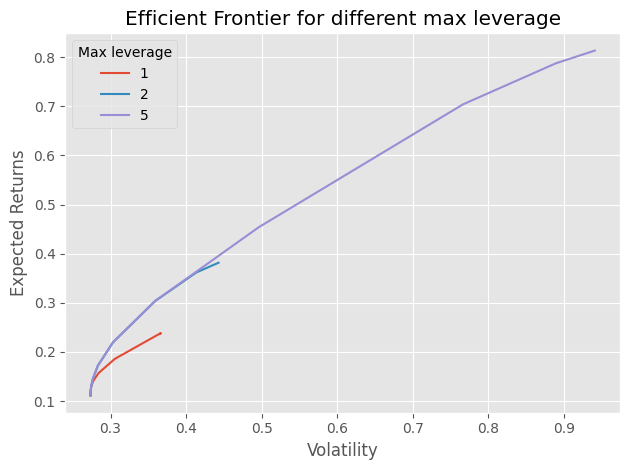

In [207]:
fig, ax = plt.subplots()

for leverage_index, leverage in enumerate(LEVERAGE_RANGE):
       
    plt.plot(portf_vol_l_ef[:, leverage_index], 
             portf_rtn_l_ef[:, leverage_index], 
             label=f'{leverage}')

ax.set(title='Efficient Frontier for different max leverage', 
       xlabel='Volatility', 
       ylabel='Expected Returns')

ax.legend(title='Max leverage')

plt.tight_layout()

plt.show()

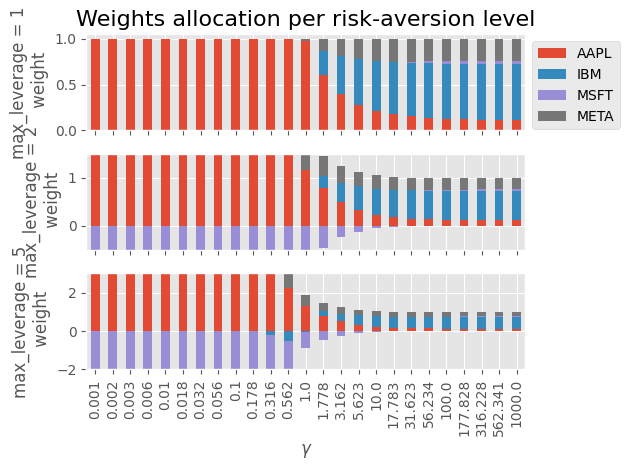

In [208]:
fig, ax = plt.subplots(len_leverage, 1, sharex=True)

for ax_index in range(len_leverage):
    
    weights_df = pd.DataFrame(weights_ef[ax_index], 
                              columns=ASSETS, 
                              index=np.round(gamma_range, 3))
    
    weights_df.plot(kind='bar', stacked=True, ax=ax[ax_index], legend=None) 
    
    ax[ax_index].set(ylabel=(f'max_leverage = {LEVERAGE_RANGE[ax_index]}' '\n weight'))

    
ax[len_leverage - 1].set(xlabel=r'$\gamma$')

ax[0].legend(bbox_to_anchor=(1, 1)) 

ax[0].set_title('Weights allocation per risk-aversion level', fontsize=16)

plt.tight_layout()

plt.show()